***
***
# 计算传播与机器学习

***
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

![](./img/machine.jpg)

## 1、 监督式学习

工作机制：
- 这个算法由一个目标变量或结果变量（或因变量）组成。
- 这些变量由已知的一系列预示变量（自变量）预测而来。
- 利用这一系列变量，我们生成一个将输入值映射到期望输出值的函数。
- 这个训练过程会一直持续，直到模型在训练数据上获得期望的精确度。
- 监督式学习的例子有：回归、决策树、随机森林、K – 近邻算法、逻辑回归等。

## 2、非监督式学习

工作机制：
- 在这个算法中，没有任何目标变量或结果变量要预测或估计。
- 这个算法用在不同的组内聚类分析。
- 这种分析方式被广泛地用来细分客户，根据干预的方式分为不同的用户组。
- 非监督式学习的例子有：关联算法和 K–均值算法。

## 3、强化学习

工作机制：
- 这个算法训练机器进行决策。
- 它是这样工作的：机器被放在一个能让它通过反复试错来训练自己的环境中。
- 机器从过去的经验中进行学习，并且尝试利用了解最透彻的知识作出精确的商业判断。 
- 强化学习的例子有马尔可夫决策过程。alphago

> Chess. Here, the agent decides upon a series of moves depending on the state of the board (the environment), and the
reward can be defined as win or lose at the end of the game:

<img src = './img/mlprocess.png' width = 800>

- 线性回归
- 逻辑回归
- 决策树
- SVM
- 朴素贝叶斯
---
- K最近邻算法
- K均值算法
- 随机森林算法
- 降维算法
- Gradient Boost 和 Adaboost 算法


> # 使用sklearn做线性回归
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

# 线性回归
- 通常用于估计连续性变量的实际数值（房价、呼叫次数、总销售额等）。
- 通过拟合最佳直线来建立自变量X和因变量Y的关系。
- 这条最佳直线叫做回归线，并且用 $Y= \beta *X + C$ 这条线性等式来表示。
- 系数 a 和 b 可以通过最小二乘法获得

In [1]:
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

import sklearn
print sklearn.__version__

0.17.1


In [2]:
# boston data
boston = datasets.load_boston()
y = boston.target

In [8]:
' '.join(dir(boston))

'__class__ __cmp__ __contains__ __delattr__ __delitem__ __dict__ __doc__ __eq__ __format__ __ge__ __getattr__ __getattribute__ __getitem__ __gt__ __hash__ __init__ __iter__ __le__ __len__ __lt__ __module__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __setitem__ __setstate__ __sizeof__ __str__ __subclasshook__ __weakref__ clear copy fromkeys get has_key items iteritems iterkeys itervalues keys pop popitem setdefault update values viewitems viewkeys viewvalues'

In [13]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [ ]:
regr = linear_model.LinearRegression()
lm = regr.fit(boston.data, y)
predicted = regr.predict(boston.data)

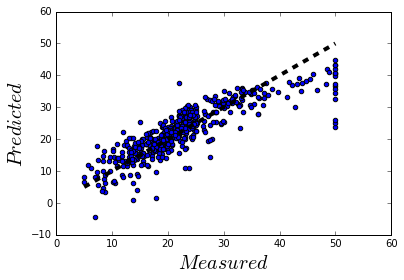

In [14]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

In [7]:
lm.intercept_, lm.coef_, lm.score(boston.data, y)

(36.491103280361614,
 array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
          2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
          7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
         -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
         -5.25466633e-01]),
 0.7406077428649428)

In [19]:
import pandas as pd

df = pd.read_csv('/Users/chengjun/github/cjc2016/data/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,【民间语文第161期】宁波px启示:船进港湾人应上岸,/post-free-2849477-1.shtml,贾也,http://www.tianya.cn/50499450,194675,2703,2012-10-29 07:59
1,宁波镇海PX项目引发群体上访 当地政府发布说明(转载),/post-free-2839539-1.shtml,无上卫士ABC,http://www.tianya.cn/74341835,88244,1041,2012-10-24 12:41


In [20]:
def randomSplit(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append([dataX[k]])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append([dataX[k]])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [22]:
import numpy as np

# Use only one feature
data_X = df.reply
# Split the data into training/testing sets
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(np.log(df.click+1), np.log(df.reply+1), 20)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)


Variance score: 0.71


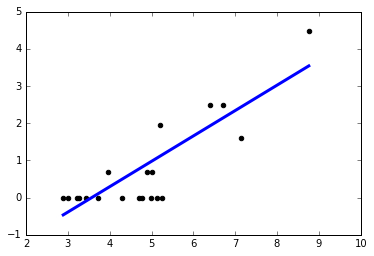

In [23]:
# Plot outputs
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue', linewidth=3)
plt.show()

In [24]:
# The coefficients
print 'Coefficients: \n', regr.coef_

Coefficients: 
[ 0.68250313]


In [25]:
# The mean square error
print "Residual sum of squares: %.2f" % np.mean((regr.predict(data_X_test) - data_y_test) ** 2)

Residual sum of squares: 0.42


In [26]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, [[c] for c in df.click], df.reply, cv = 3)
scores.mean()  

0.21630869764168115

In [27]:
from sklearn.cross_validation import cross_val_score
x = [[c] for c in np.log(df.click +0.1)]
y = np.log(df.reply+0.1)

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, x, y  , cv = 3)
scores.mean()   

0.094653525644729064

> # 使用sklearn做logistic回归
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

- logistic回归是一个分类算法而不是一个回归算法。
- 可根据已知的一系列因变量估计离散数值（比方说二进制数值 0 或 1 ，是或否，真或假）。
- 简单来说，它通过将数据拟合进一个逻辑函数(logistic function)来预估一个事件出现的概率。
- 因此，它也被叫做逻辑回归。因为它预估的是概率，所以它的输出值大小在 0 和 1 之间（正如所预计的一样）。

$$odds= \frac{p}{1-p} = \frac{probability\: of\: event\: occurrence} {probability \:of \:not\: event\: occurrence}$$

$$ln(odds)= ln(\frac{p}{1-p})$$

$$logit(x) = ln(\frac{p}{1-p}) = b_0+b_1X_1+b_2X_2+b_3X_3....+b_kX_k$$

![](./img/logistic.jpg)

In [96]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [78]:
data_X = [[df.click[i], df.reply[i]] for i in range(len(df))]
data_X[:3]

[[194675, 2703], [88244, 1041], [82779, 625]]

In [97]:
from sklearn.linear_model import LogisticRegression
df['repost'] = repost
model.fit(data_X,df.repost)
model.score(data_X,df.repost)

0.91648822269807284

In [86]:
def randomSplitLogistic(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append(dataX[k])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append(dataX[k])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [98]:
# Split the data into training/testing sets
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
# Create linear regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(data_X_test, data_y_test)

Variance score: 0.60


In [99]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X,df.repost, cv = 3)
scores.mean()  

0.53333333333333333

> # 使用sklearn实现贝叶斯预测
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

# Naive Bayes algorithm

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. 

In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

why it is known as ‘Naive’? For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple.

贝叶斯定理为使用$p(c)$, $p(x)$, $p(x|c)$ 计算后验概率$P(c|x)$提供了方法：

$$
p(c|x) = \frac{p(x|c) p(c)}{p(x)}
$$

- P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
- P(c) is the prior probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

![](http://i0.wp.com/www.analyticsvidhya.com/wp-content/uploads/2015/08/Bayes_41.png?w=861)

Step 1: Convert the data set into a frequency table

Step 2: Create Likelihood table by finding the probabilities like:
- p(Overcast) = 0.29, p(rainy) = 0.36, p(sunny) = 0.36
- p(playing) = 0.64, p(rest) = 0.36

Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

## Problem: Players will play if weather is sunny. Is this statement is correct?

We can solve it using above discussed method of posterior probability.

$P(Yes | Sunny) = \frac{P( Sunny | Yes) * P(Yes) } {P (Sunny)}$

Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

Now, $P (Yes | Sunny) = \frac{0.33 * 0.64}{0.36} = 0.60$, which has higher probability.

In [17]:
from sklearn import naive_bayes
'  '.join(dir(naive_bayes))

'ABCMeta  BaseDiscreteNB  BaseEstimator  BaseNB  BernoulliNB  ClassifierMixin  GaussianNB  LabelBinarizer  MultinomialNB  __all__  __builtins__  __doc__  __file__  __name__  __package__  _check_partial_fit_first_call  abstractmethod  binarize  check_X_y  check_array  check_is_fitted  in1d  issparse  label_binarize  logsumexp  np  safe_sparse_dot  six'

- naive_bayes.GaussianNB	Gaussian Naive Bayes (GaussianNB)
- naive_bayes.MultinomialNB([alpha, ...])	Naive Bayes classifier for multinomial models
- naive_bayes.BernoulliNB([alpha, binarize, ...])	Naive Bayes classifier for multivariate Bernoulli models.

In [29]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [30]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x[:8], Y[:8])

#Predict Output 
predicted= model.predict([[1,2],[3,4]])
print predicted

[4 3]


In [31]:
model.score(x[8:], Y[8:])

0.25

# cross-validation 
    
k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:
- A model is trained using k-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

In [48]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(df.click, df.reply, 20)
# Train the model using the training sets 
model.fit(data_X_train, data_y_train)

#Predict Output 
predicted= model.predict(data_X_test)
print predicted

[41 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [49]:
model.score(data_X_test, data_y_test)

0.65000000000000002

In [51]:
from sklearn.cross_validation import cross_val_score

model = GaussianNB()
scores = cross_val_score(model, [[c] for c in df.click], df.reply, cv = 5)
scores.mean()    

0.49403904714780522

> # 使用sklearn实现决策树
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

# 决策树
- 这个监督式学习算法通常被用于分类问题。
- 它同时适用于分类变量和连续因变量。
- 在这个算法中，我们将总体分成两个或更多的同类群。
- 这是根据最重要的属性或者自变量来分成尽可能不同的组别。


![](./img/tree.png)

![](./img/playtree.jpg)

## 在上图中你可以看到，根据多种属性，人群被分成了不同的四个小组，来判断 “他们会不会去玩”。
### 为了把总体分成不同组别，需要用到许多技术，比如说 Gini、Information Gain、Chi-square、entropy。

In [92]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [100]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.91722595078299773

In [95]:
# Predict
model.predict(data_X_test)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [102]:
# crossvalidation
scores = cross_val_score(model, data_X, df.repost, cv = 3)
scores.mean()   

0.33461538461538459

> # 使用sklearn实现SVM支持向量机
***

王成军

wangchengjun@nju.edu.cn

计算传播网 http://computational-communication.com

![](./img/svm.jpg)

- 将每个数据在N维空间中用点标出（N是你所有的特征总数），每个特征的值是一个坐标的值。
   - 举个例子，如果我们只有身高和头发长度两个特征，我们会在二维空间中标出这两个变量，每个点有两个坐标（这些坐标叫做支持向量）。

![](./img/xyplot.png)

- 现在，我们会找到将两组不同数据分开的一条直线。
    - 两个分组中距离最近的两个点到这条线的距离同时最优化。

![](./img/sumintro.png)

## 上面示例中的黑线将数据分类优化成两个小组
- 两组中距离最近的点（图中A、B点）到达黑线的距离满足最优条件。
    - 这条直线就是我们的分割线。接下来，测试数据落到直线的哪一边，我们就将它分到哪一类去。

In [108]:
from sklearn import svm
# Create SVM classification object 
model=svm.SVC() 

In [107]:
' '.join(dir(svm))

'LinearSVC LinearSVR NuSVC NuSVR OneClassSVM SVC SVR __all__ __builtins__ __doc__ __file__ __name__ __package__ __path__ base bounds classes l1_min_c liblinear libsvm libsvm_sparse'

In [109]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.90156599552572703

In [110]:
# Predict
model.predict(data_X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [117]:
# crossvalidation
scores = []
cvs = [3, 5, 10, 25, 50, 75, 100]
for i in cvs:
    score = cross_val_score(model, data_X, df.repost, cv = i)
    scores.append(score.mean() ) # Try to tune cv
      

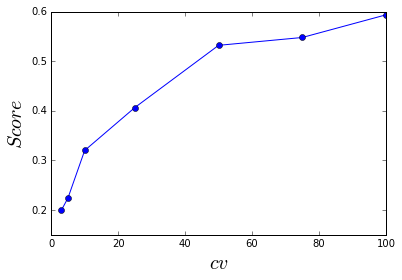

In [119]:
plt.plot(cvs, scores, 'b-o')
plt.xlabel('$cv$', fontsize = 20)
plt.ylabel('$Score$', fontsize = 20)
plt.show()

机器学习算法的要点（附 Python 和 R 代码）http://blog.csdn.net/a6225301/article/details/50479672

The "Python Machine Learning" book code repository and info resource https://github.com/rasbt/python-machine-learning-book

An Introduction to Statistical Learning (James, Witten, Hastie, Tibshirani, 2013) : Python code https://github.com/JWarmenhoven/ISLR-python

BuildingMachineLearningSystemsWithPython https://github.com/luispedro/BuildingMachineLearningSystemsWithPython